<img src="logo.png" />


# ASTR 19 Project - Ocean tides at Santa Cruz

Loren Alzona, Janerryll Esclanda, Lingchen Zeng

## Abstract

We modeled ocean tides in Santa Cruz during January–February 2022 and a two-sine function with 12-hour and 24-hour periods plus a constant offset. Using curve_fit with an assumed measurement uncertainty of 0.25 ft, we fit this model to the data and found it reproduces the main tidal pattern of alternating high and low tides. We then analyzed the residuals, measured their standard deviation, and estimated an additional intrinsic scatter beyond the assumed experimental error. Finally, we tried to simulate the January 14 tsunami as a +2 ft deviation at high tide and expressed its size in units of the residual scatter.

## Setup

Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.image as mpimg

# setting default colors to the graphs
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.color"] = "white"
plt.rcParams["ytick.color"] = "white"
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.facecolor"] = "none"
plt.rcParams["legend.labelcolor"] = "black"

# logo image
logo = mpimg.imread("logo.png")

Turn the raw data into usable array,

In [2]:
raw_data_path = "ASTR19_F25_group_project_data.txt"

usable_data = np.genfromtxt(
    raw_data_path,
    comments="#",
    dtype=[("day", int), ("time_str", "U8"), ("height_ft", float)],
    autostrip=True,
)

Extract usable information like time of the day and height of the tide, in consideration of the fact that the time is in hour:minutes form

In [3]:
parts = np.char.partition(usable_data["time_str"], ":")
hour = parts[:, 0].astype(int)
minute = parts[:, 2].astype(int)

#T+ time in minutes if needs to be used in the future
t_plus_minutes = ((24 * (usable_data["day"]-1) + hour) * 60) + minute
#T+ time in hours
t_plus_hours = t_plus_minutes / 60
y_axis = usable_data["height_ft"].astype(float)

Just making sure everything is running just fine

In [4]:
print(f"Loaded {t_plus_hours.size} rows from {raw_data_path}")
for i in range(usable_data.size):
   print(f"day={usable_data['day'][i]} "
         f"time={usable_data['time_str'][i]} "
         f"t_hours={t_plus_hours[i]} "
         f"t_minutes={t_plus_minutes[i]} "
         f"height_ft={y_axis[i]}")

Loaded 82 rows from ASTR19_F25_group_project_data.txt
day=1 time=8:07 t_hours=8.116666666666667 t_minutes=487 height_ft=6.57
day=1 time=15:37 t_hours=15.616666666666667 t_minutes=937 height_ft=-0.39
day=2 time=8:55 t_hours=32.916666666666664 t_minutes=1975 height_ft=5.38
day=2 time=16:25 t_hours=40.416666666666664 t_minutes=2425 height_ft=-1.74
day=3 time=9:45 t_hours=57.75 t_minutes=3465 height_ft=5.26
day=3 time=17:14 t_hours=65.23333333333333 t_minutes=3914 height_ft=-1.36
day=4 time=10:35 t_hours=82.58333333333333 t_minutes=4955 height_ft=4.13
day=4 time=18:00 t_hours=90.0 t_minutes=5400 height_ft=-1.15
day=5 time=11:28 t_hours=107.46666666666667 t_minutes=6448 height_ft=3.48
day=5 time=18:46 t_hours=114.76666666666667 t_minutes=6886 height_ft=-1.61
day=6 time=12:22 t_hours=132.36666666666667 t_minutes=7942 height_ft=2.62
day=6 time=19:31 t_hours=139.51666666666668 t_minutes=8371 height_ft=0.05
day=7 time=13:24 t_hours=157.4 t_minutes=9444 height_ft=1.83
day=7 time=20:16 t_hours=16

## Tide project

Define an oscillation function that reflect the tide trend (both in a 12hour cycle and 24 hour cycle)

In [5]:
#Known the line should goes just like a sine function
#Known that we need to describe the intra- and inter-day variations, that means the sum of two periodic sine functions

#Set up for adjusting amplitude and phase (in minutes)
def tide_model(t, A1, phase1, A2, phase2, offset):
    intra_time = 12.0 *60
    inter_time = 24.0 *60
    return (A1*np.sin(2*np.pi * t / intra_time + phase1) +
            A2*np.sin(2*np.pi * t / inter_time + phase2) +
            offset)

Curve fitting

In [6]:
uncertainty = 0.25 # given 0.25

#In scipy's documentation, the sigma modifier of the curve fit must match the length and format of ydata
sigma = np.full_like(y_axis, uncertainty, dtype=float)


popt, pcov = curve_fit(
    f = tide_model,
    xdata = t_plus_minutes,
    ydata = y_axis,
    sigma = sigma,
)

print("Fit params:", popt)

y_fit = tide_model(t_plus_minutes, *popt)

Fit params: [9.24296202e-01 9.08782324e+00 2.83055736e+00 3.41780080e-03
 2.58038746e+00]


Tide graph

C:\Users\76526\AppData\Local\Temp\ipykernel_55292\607576890.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


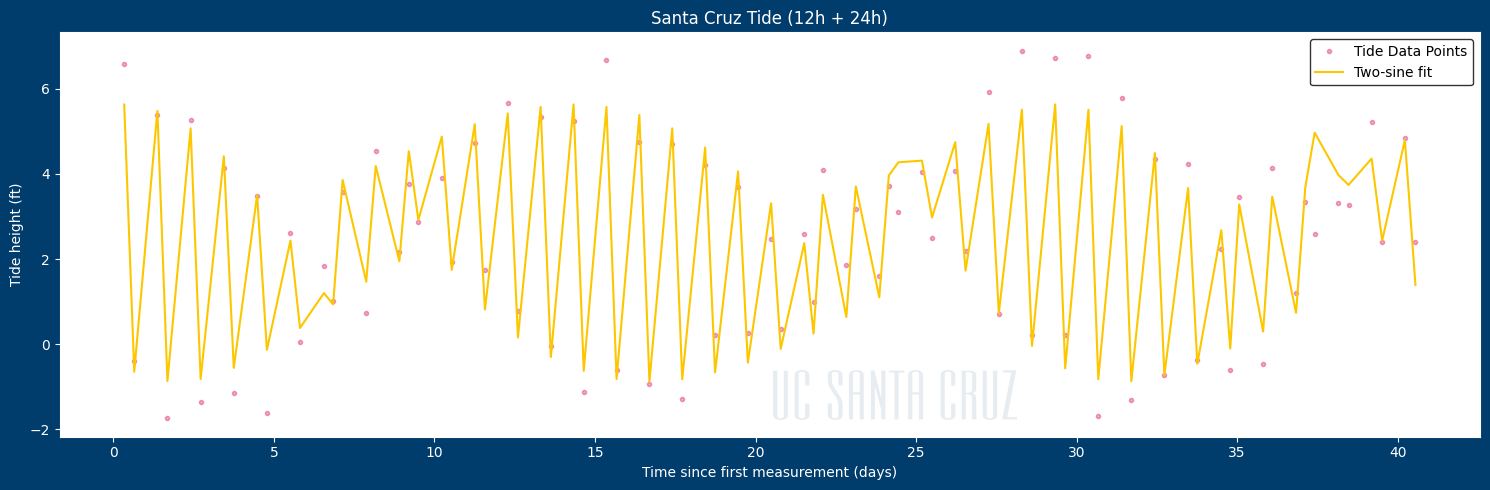

In [7]:
t_plot_days = t_plus_hours / 24.0

#official hex code for UCSC BLUE"#003c6c" AND YELLOW"#fdc700"
fig, ax = plt.subplots(figsize=(15,5), facecolor="#003c6c")

ax.plot(t_plot_days, y_axis, ".", color="#da216d", label="Tide Data Points", alpha=0.4)
ax.plot(t_plot_days, y_fit, "-", color="#fdc700", label="Two-sine fit", linewidth=1.5)

ax.set_xlabel("Time since first measurement (days)")
ax.set_ylabel("Tide height (ft)")
ax.set_title("Santa Cruz Tide (12h + 24h)")
ax.legend()

#add logo
logo_ax = fig.add_axes([0.1, 0.15, 1, 0.1])
logo_ax.imshow(logo, alpha=0.1)
logo_ax.axis("off")

fig.tight_layout()
fig.savefig("Santa_Cruz_Tide (12h + 24h).pdf")
plt.show()

Calculating residual

In [8]:
resid = y_axis - y_fit
std_resid = np.std(resid, ddof=1) # total residual

Residual graph

C:\Users\76526\AppData\Local\Temp\ipykernel_55292\1248642126.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


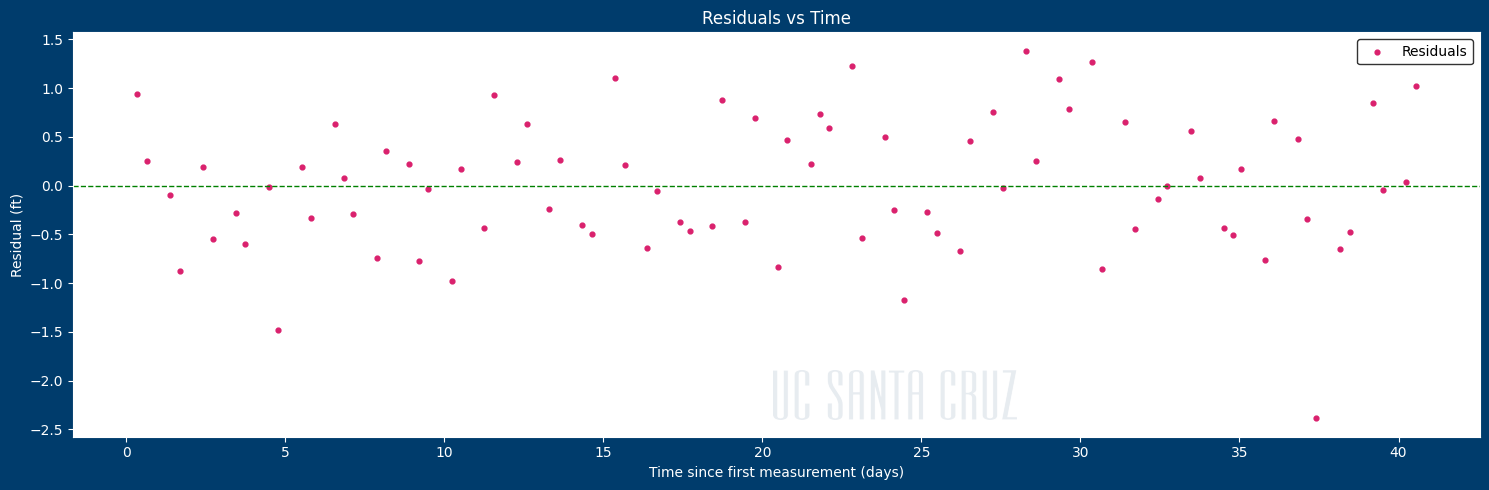

In [9]:
fig, ax = plt.subplots(figsize=(15,5), facecolor="#003c6c")

ax.axhline(0, ls="--", lw=1, color="green")
ax.scatter(t_plot_days, resid, s=12, color="#da216d", label="Residuals")

ax.set_xlabel("Time since first measurement (days)")
ax.set_ylabel("Residual (ft)")
ax.set_title("Residuals vs Time")
ax.legend()

#add logo
logo_ax = fig.add_axes([0.1, 0.15, 1, 0.1])
logo_ax.imshow(logo, alpha=0.1)
logo_ax.axis("off")

fig.tight_layout()
fig.savefig("Residuals.pdf")
plt.show()

Residual histogram

C:\Users\76526\AppData\Local\Temp\ipykernel_55292\2109782110.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


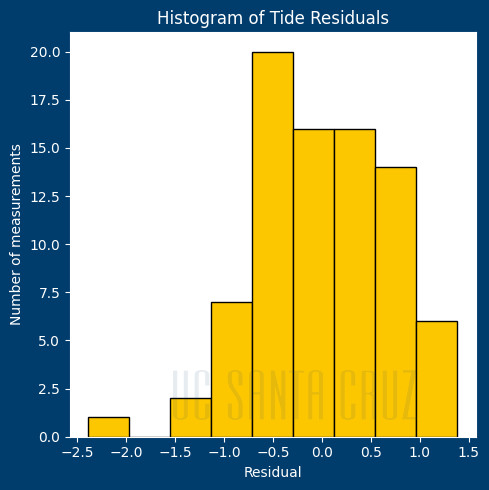

Residual standard deviation: 0.6775969614030066
The scatter in the data is larger than the assumed value of 0.25.


In [10]:
#"reasonable" number of bins = sqrt of the total number of data points
n_bins = int(np.sqrt(len(resid)))

fig, ax = plt.subplots(figsize=(5, 5), facecolor="#003c6c")

ax.hist(
    resid,
    bins=n_bins,
    edgecolor="black",
    histtype="bar",
    color="#fdc700"
)

ax.set_xlabel("Residual")
ax.set_ylabel("Number of measurements")
ax.set_title("Histogram of Tide Residuals")

#add logo
logo_ax = fig.add_axes([0.1, 0.15, 1, 0.1])
logo_ax.imshow(logo, alpha=0.1)
logo_ax.axis("off")

fig.tight_layout()
fig.savefig("Residuals_histogram.pdf")
plt.show()

print(f"Residual standard deviation: {std_resid}")
if std_resid > uncertainty:
    print(f"The scatter in the data is larger than the assumed value of {uncertainty}.")
elif std_resid < uncertainty:
    print(f"The scatter in the data is smaller than the assumed value of {uncertainty}.")
else:
    print(f"The scatter in the data equals the assumed value of {uncertainty}.")


Estimate intrinsic scatter

In [11]:
intrinsic = np.sqrt(max(0.0, std_resid**2 - uncertainty**2))
print(f"Estimated intrinsic scatter: {intrinsic}")

Estimated intrinsic scatter: 0.6297917450257566


Tsunami impact study

In [12]:
tsunami_resid = 2.0  # given 2.0

tsunami_vs_total_residual = tsunami_resid / std_resid

print(f"Tsunami deviation relative to total residual: {tsunami_vs_total_residual}")

Tsunami deviation relative to total residual: 2.9516070967302976


Residual Histogram with 2ft tsunami

C:\Users\76526\AppData\Local\Temp\ipykernel_55292\1222414999.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


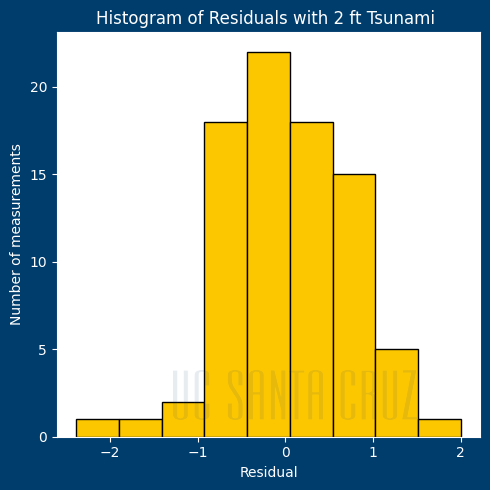

In [13]:
resid_with_tsunami = np.append(resid, tsunami_resid)

#"reasonable" number of bins = sqrt of the total number of data points
n_bins = int(np.sqrt(len(resid_with_tsunami)))

fig, ax = plt.subplots(figsize=(5, 5), facecolor="#003c6c")

ax.hist(
    resid_with_tsunami,
    bins=n_bins,  # same number of bins as before
    edgecolor="black",
    histtype="bar",
    color="#fdc700"
)

ax.set_xlabel("Residual")
ax.set_ylabel("Number of measurements")
ax.set_title("Histogram of Residuals with 2 ft Tsunami ")

#add logo
logo_ax = fig.add_axes([0.1, 0.15, 1, 0.1])
logo_ax.imshow(logo, alpha=0.1)
logo_ax.axis("off")

fig.tight_layout()
fig.savefig("Residuals_histogram_with_tsunami.pdf")
plt.show()

## Conclusion

1. Is the scatter in the data larger than the assumed experimental error?

The scatter in the data is larger than the assumed value of 0.25.

2. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model?

The tsunami corresponds to about 2.9516070967302976 standard deviations from the normal tide distribution predicted by our model.